In [1]:
#save_excel ფუნქცია რომელიც თითოეულ ცვლადზე შემიძლია ვამოქმედო 
# მაგ woe_analysis.discrete(column="RiskGrade", df=X_train, target=y_train).plot().save_excel(path=grouping_path,save=False) სადაც save_excel მეთოდი შეინახავს ამ კონკრეტული ცვლადის woe_analysis მიერ დაბრუნებული ცხრილის შედეგს ექსელის ფაილად ? (ისე სვა ფორმატშიც ხოარ შევანახინოთ და უბრალოდ save ქონდეს და დასუპორტებული ფორმატები რაშიც შეინახება და მაგ ფორმატს იუზერი გადაცემს მაგ format = '.txt', '.pkl', '.xlsx' და ა.შ ეს save სად მოედება მნიშვნელობა არ აქვს თუ ერორი არ იყო კოდში დდა სეივი ჩართულია უნდა შეინახოს საბოლოო შედეგი 


# პ.ს არ მახსოვს გასწორდა თუ არა მაგრამ წინაზე რო ვტესტავდი მეთპდების გადანაცვლებით შედეგები იცვლებოდა (პრინტები) და ახლა როგორაა?



In [1]:
#import pandas as pd
from module import WoeAnalysis
import numpy as np



In [2]:
df = pd.read_pickle("data.pkl")

In [10]:
df2 = df

In [4]:

# creating a new DataFrame X 
X_train = df.drop(columns=['Actual'])

# create y containing only the 'Actual' column
y_train = df['Actual']

In [5]:
# Example usage
woe_analysis = WoeAnalysis()

,RiskGrade,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,E3,366,0.327655,281.0,76.775956,85.0,23.224044,0.273567,0.945916,-1.240606,NaN,NaN,28.816512,0.834120,True
1,E2,661,0.591748,554.0,83.812405,107.0,16.187595,0.539346,1.190741,-0.791974,7.036449,0.448632,28.816512,0.515888,True
2,E1,4780,4.279205,4053.0,84.790795,727.0,15.209205,3.945793,8.090363,-0.718024,0.978390,0.073950,28.816512,2.975899,True
3,Unknown,3014,2.698227,2576.0,85.467817,438.0,14.532183,2.507861,4.874249,-0.664536,0.677022,0.053488,28.816512,1.572549,True
4,D3,12241,10.958524,10709.0,87.484683,1532.0,12.515317,10.425733,17.048742,-0.491799,2.016866,0.172736,28.816512,3.257192,True
5,D2,10206,9.136729,8952.0,87.713110,1254.0,12.286890,8.715208,13.955041,-0.470771,0.228427,0.021028,28.816512,2.466763,True
6,NotAvailable,5004,4.479736,4501.0,89.948042,503.0,10.051958,4.381943,5.597596,-0.244845,2.234932,0.225926,28.816512,0.297647,True
7,D1,13161,11.782137,11932.0,90.661804,1229.0,9.338196,11.616383,13.676831,-0.163287,0.713762,0.081558,28.816512,0.336444,True
8,C3,15557,13.927110,14422.0,92.704249,1135.0,7.295751,14.040519,12.630759,0.105812,2.042445,0.269099,28.816512,0.149170,True
9,C2,18654,16.699641,17688.0,94.821486,966.0,5.178514,17.220129,10.750056,0.471168,2.117237,0.365356,28.816512,3.048492,True


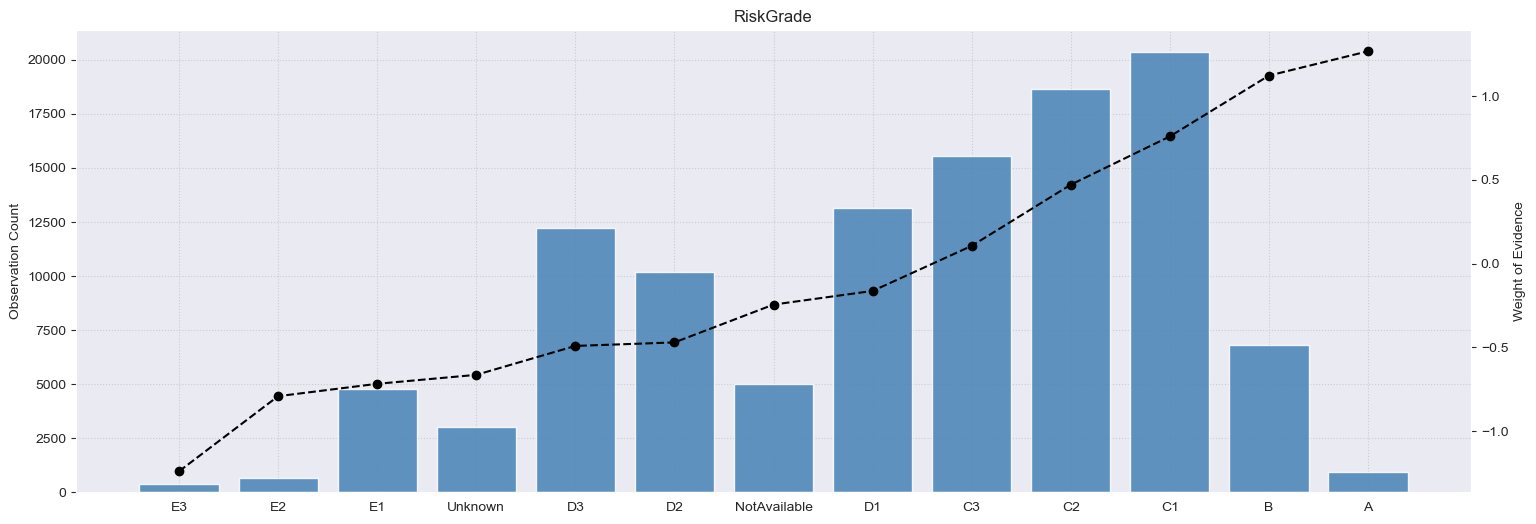

In [6]:
woe_analysis.discrete(column="RiskGrade", df=X_train, target=y_train).plot()

,Score_factor,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,"(-60.0, -1.1]",3014,2.698227,2576.0,85.467817,438.0,14.532183,2.507861,4.874249,-0.664536,NaN,NaN,29.470818,1.572549,True
1,"(-1.1, -0.001]",5004,4.479736,4501.0,89.948042,503.0,10.051958,4.381943,5.597596,-0.244845,4.480225,0.419691,29.470818,0.297647,True
2,"(-0.001, 209.0]",1027,0.919402,835.0,81.304771,192.0,18.695229,0.812913,2.136657,-0.966373,8.643270,0.721528,29.470818,1.279231,True
3,"(209.0, 234.0]",4780,4.279205,4053.0,84.790795,727.0,15.209205,3.945793,8.090363,-0.718024,3.486024,0.248350,29.470818,2.975899,True
4,"(234.0, 259.0]",12241,10.958524,10709.0,87.484683,1532.0,12.515317,10.425733,17.048742,-0.491799,2.693888,0.226224,29.470818,3.257192,True
5,"(259.0, 272.0]",10206,9.136729,8952.0,87.713110,1254.0,12.286890,8.715208,13.955041,-0.470771,0.228427,0.021028,29.470818,2.466763,True
6,"(272.0, 277.0]",4923,4.407223,4414.0,89.660776,509.0,10.339224,4.297244,5.664367,-0.276221,1.947666,0.194550,29.470818,0.377628,True
7,"(277.0, 284.0]",8238,7.374914,7518.0,91.260015,720.0,8.739985,7.319139,8.012464,-0.090506,1.599239,0.185716,29.470818,0.062750,True
8,"(284.0, 288.0]",5490,4.914819,5056.0,92.094718,434.0,7.905282,4.922262,4.829735,0.018977,0.834703,0.109482,29.470818,0.001756,True
9,"(288.0, 293.0]",7101,6.357036,6593.0,92.846078,508.0,7.153922,6.418606,5.653238,0.126972,0.751360,0.107996,29.470818,0.097181,True


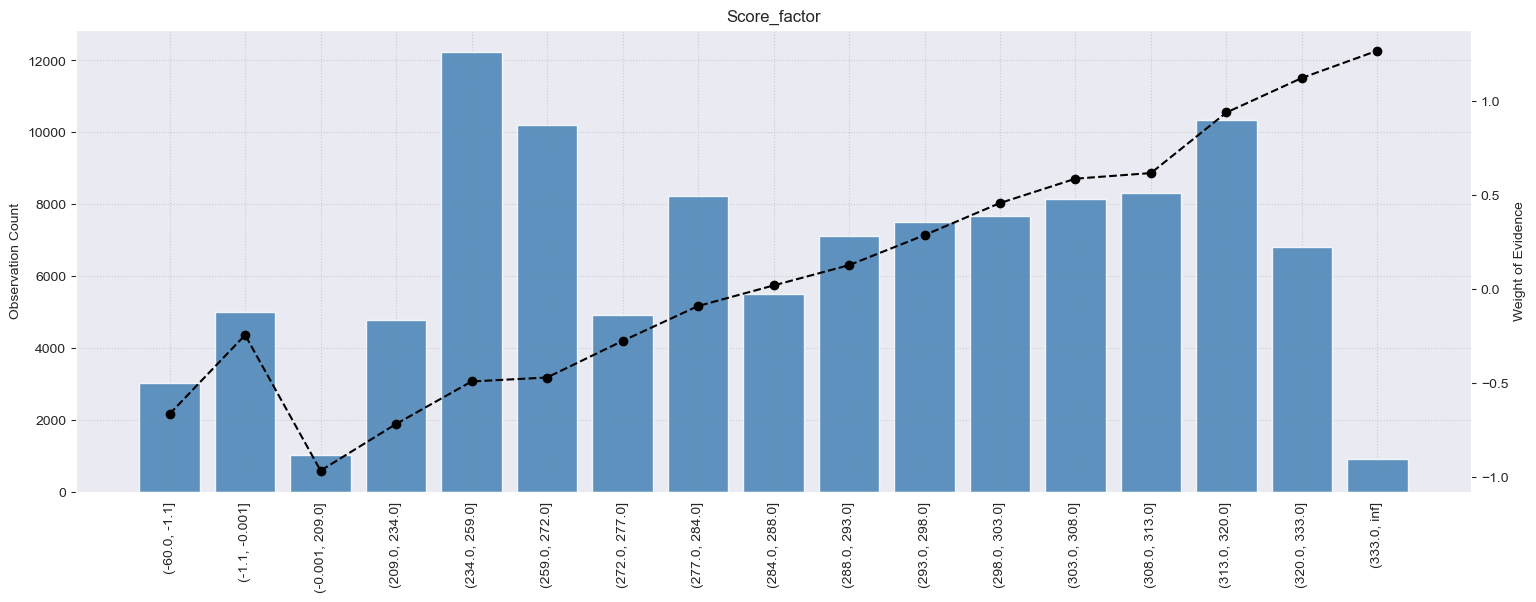

In [7]:
bins = pd.IntervalIndex.from_tuples([(-60,-1.1), (-1.1,-0.001),(-0.001, 209),  (209, 234),(234, 259), (259, 272), (272, 277),(277, 284), (284, 288),(288, 293),(293, 298), (298, 303),(303, 308), (308, 313),(313, 320), (320, 333), (333, np.inf)])

woe_analysis.continuous(column="Score", bins= bins,df=X_train, target=y_train).plot(rotation=90)

In [8]:
WoE_dict = woe_analysis.WoE_dict
IV_dict = woe_analysis.IV_dict
IV_excel = woe_analysis.IV_excel

names = list(pd.DataFrame({"name":[i.split(":")[0] for i in WoE_dict ]})["name"].unique())
names

['RiskGrade', 'Score']

In [12]:
from Preprocessing import Preprocessing, WoE_Binning


# Example usage
def step1(df):
    # Example transformation: Add a new column
    df['new_Score'] = df['Score'] * 4
    return df

def step2(df):
    # Example transformation: Filter data
    return df[df['new_Score'] > 1200]



# Create the pipeline
pipeline = Preprocessing()
pipeline.add_step(step1)   # არგუმენტად ვერ გადავცემ იმ სახელის დათაფრეიმს რაცმინდა ?
pipeline.add_step(step2)


# Apply the pipeline
transformed_data = pipeline.apply(X_train)
transformed_data


,RiskGrade,Score,new_Score
17,C1,320.0,1280.0
42,B,325.0,1300.0
47,C1,315.0,1260.0
115,C2,303.0,1212.0
152,A,339.0,1356.0
...,...,...,...
3691400,B,323.0,1292.0
3691433,C1,310.0,1240.0
3691477,C2,304.0,1216.0
3691505,C1,313.0,1252.0


In [ ]:
WoE_dict

In [ ]:
lss = pd.concat([X_train, pd.DataFrame({'RiskGrade': ["C30"],'Score': [-50]})], ignore_index=True)

In [ ]:
woe_binner = WoE_Binning(WoE_dict)
data_after = woe_binner.transform(lss)
data_after